In [306]:
import io
import json
import boto3
import base64
import pickle
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML, display, Image

In [107]:
def get_proxy():
    num_proxies = 10
    lambda_client = boto3.client('lambda')
    round_robin = 0
    while True:
        url = yield
        response = json.loads(
            lambda_client.invoke(FunctionName=f'proxy-{round_robin}',
                                 InvocationType='RequestResponse',
                                 Payload=json.dumps({"url":
                                                     url}))['Payload'].read())
        yield response
        round_robin = (round_robin + 1) % num_proxies

In [109]:
proxy = get_proxy()

353: Various - Putting The Morr Back In Morrissey


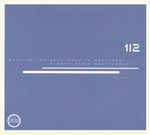

199489: Various - Putting The Morr Back In Morrissey 


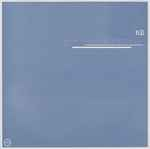

489403: Morrissey - November Spawned A Monster


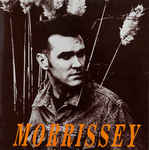

635531: Morrissey - Bona Drag


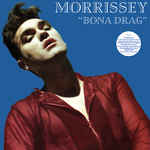

2402550: Morrissey Mullen - Life On The Wire


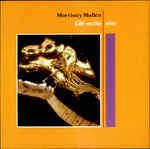

4157793: Leo Garcia - Morrissey


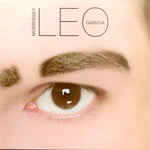

In [330]:
release_info = pickle.load(open('release_info.p', 'rb'))
search_text = 'morrissey'
search_text = '+'.join(search_text.lower().split(' '))
candidates = [(_, release_info[_]) for _ in release_info if all([word in f'{release_info[_][0]} {release_info[_][1]}'.lower() for word in search_text.split('+')])]
for _ in candidates:
    print(f'{_[0]}: {_[1][0]} - {_[1][1]}')
    display(Image(open(f'thumbs2/thumb_{_[0]}.jpg', 'rb').read())) ############################

In [331]:
url = f'https://www.popsike.com/php/quicksearch.php?searchtext={search_text}&pagenum=1&sprice=&eprice=&bidsfrom=&bidsthru=&endfrom=&endthru=&currsel=1'
proxy.send(None)
response = proxy.send(url)
soup = BeautifulSoup(base64.b64decode(response['body']).decode('utf-8'), 'html.parser')
links = soup.find_all('a', href=True)
items = []
for link in links:
    if link.find('img') and link.find('img')['src'][:4] == '/thu':
        items.append((link['href'][2:], link.find('img')['src']))


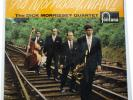
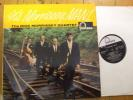
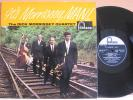
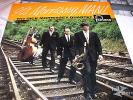
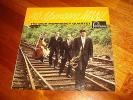
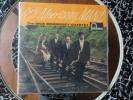
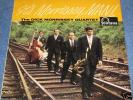
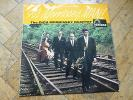
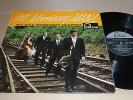
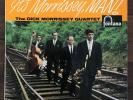
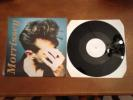
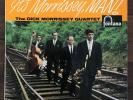
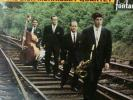
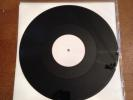
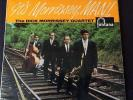
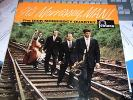
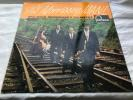
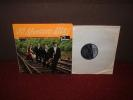
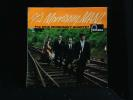
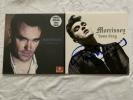
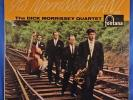
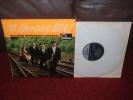
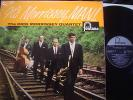
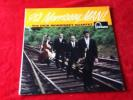
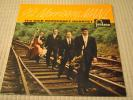

In [332]:
def _src_from_data(data):
    """Base64 encodes image bytes for inclusion in an HTML img element"""
    img_obj = Image(data=data)
    for bundle in img_obj._repr_mimebundle_():
        for mimetype, b64value in bundle.items():
            if mimetype.startswith('image/'):
                return f'data:{mimetype};base64,{b64value}'
            
figures = []
for _, item in enumerate(items):
    proxy.send(None)
    response = proxy.send('https://popsike.com' + item[1])
    image = base64.b64decode(response['body'])
    if isinstance(image, bytes):
        src = _src_from_data(image)
        caption = _
    else:
        src = image
        caption = f'<figcaption style="font-size: 0.6em">{image}</figcaption>'
    figures.append(f'''
        <figure style="margin: 5px !important;">
          <img src="{src}" style="height: auto">
          {caption}
        </figure>
    ''')
HTML(data=f'''
    <div style="display: flex; flex-flow: row wrap; text-align: center;">
    {''.join(figures)}
    </div>
''')

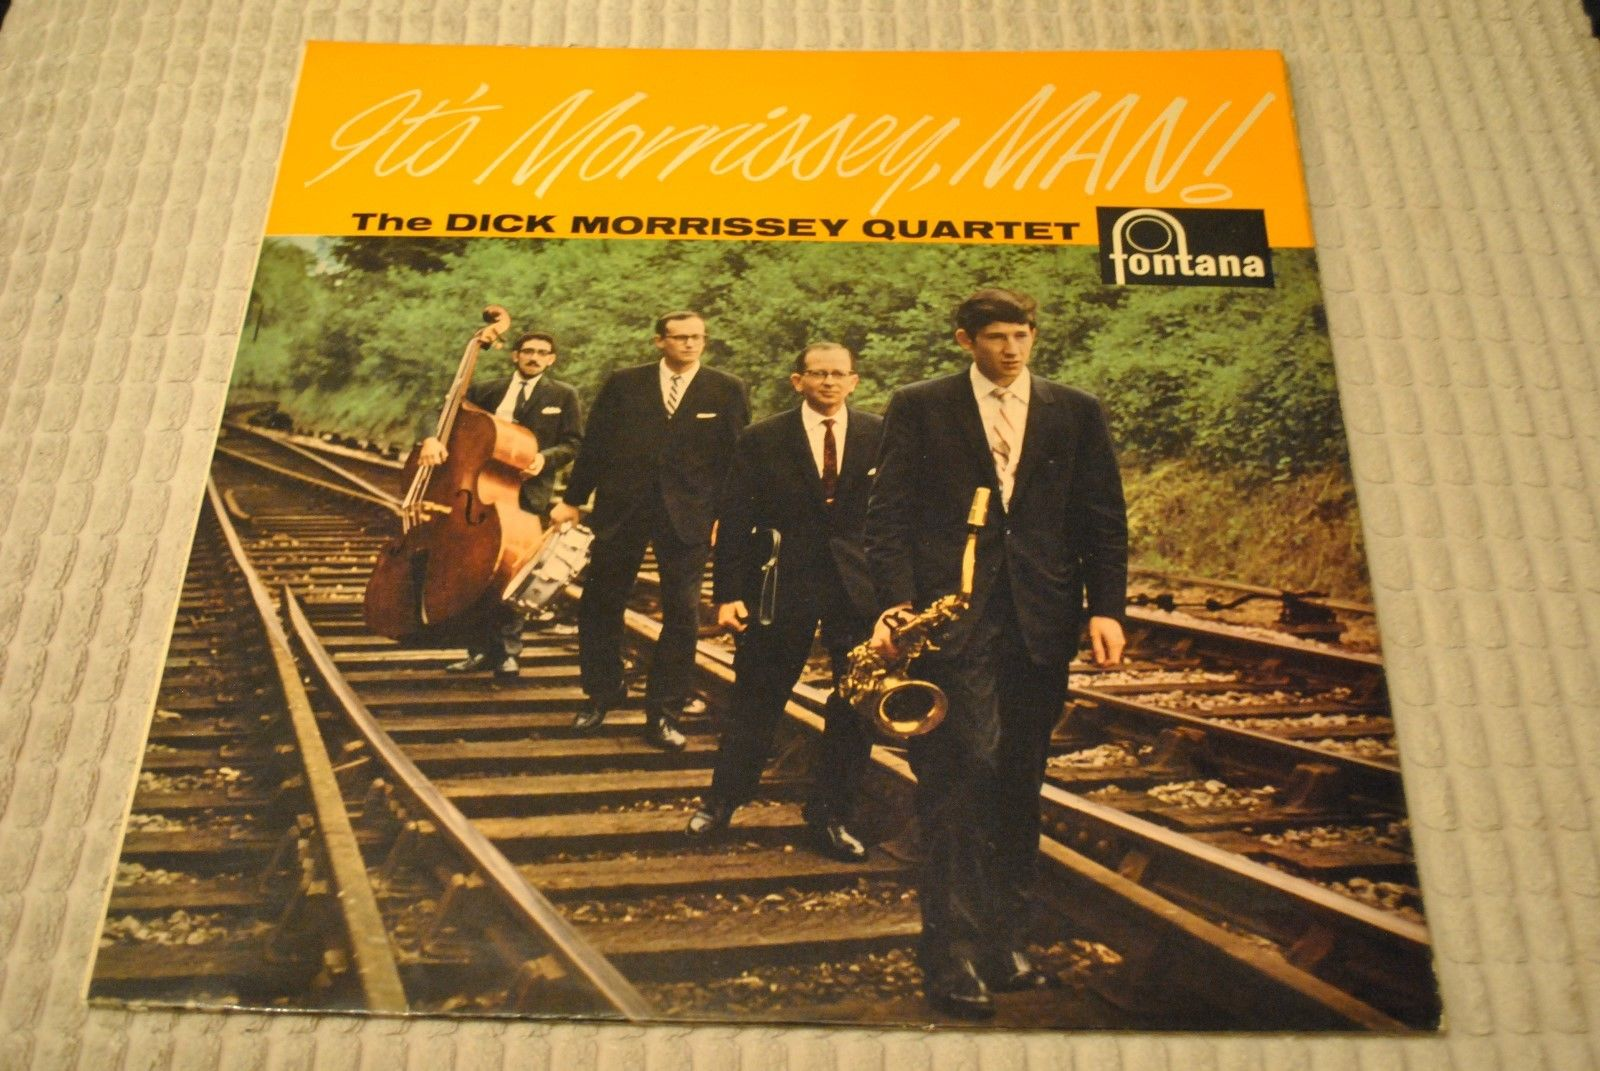

In [336]:
item_number = 24
proxy.send(None)
response = proxy.send('https://popsike.com' + items[item_number][0])
soup = BeautifulSoup(base64.b64decode(response['body']).decode('utf-8'), 'html.parser')
soup.find_all('img')[0]['src']
proxy.send(None)
response = proxy.send(soup.find_all('img')[0]['src'])
img = Image(base64.b64decode(response['body']))
display(img)

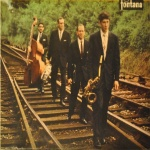

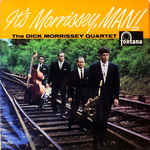

In [337]:
r = requests.post(
    'http://127.0.0.1:8000/uploadfile/',
    files={'file': ('image', base64.b64decode(response['body']), 'image/jpeg')})
r2 = requests.post(
    'http://127.0.0.1:8001/uploadfile/',
    files={'file': ('image', r.content, 'image/jpeg')})
result = json.loads(r2.text)
display(
    HTML(f'<h2>{result["id"]} ({result["proximity"]}) {result["artist"]} {result["title"]}</h2>'),
    Image(r.content, width=200, height=200),
    Image(open(f'thumbs/thumb_{result["id"]}.jpg', 'rb').read(), width=200, height=200),
)

1919801


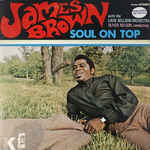

In [294]:
release = candidates[0][0]
print(release)
display(Image(open(f'thumbs2/thumb_{release}.jpg', 'rb').read(), width=200, height=200)) ############

In [303]:
with open(f'popsike/{release}.jpg', 'wb') as file:
    file.write(base64.b64decode(response['body']))